### A new visualization notebook 
With the new epoch data and the working montage file   
NOTE: We placed the working montage file for the ANT Duke Waveguard 128 ch cap in the mne python source code  
(/Users/shateeshbhugwansing/anaconda/envs/mne/lib/python3.6/site-packages/mne/channels/data/montages) folder for easy access.

In [1]:
# %run ../preprocessing/StimCodes.ipynb
import mne
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline 

import matplotlib
matplotlib.rcParams.update({'font.size': 11})

In [2]:
montage = mne.channels.read_montage(kind="ANT_DukeWaveGuard_128_electrode_montages_updated_V4")


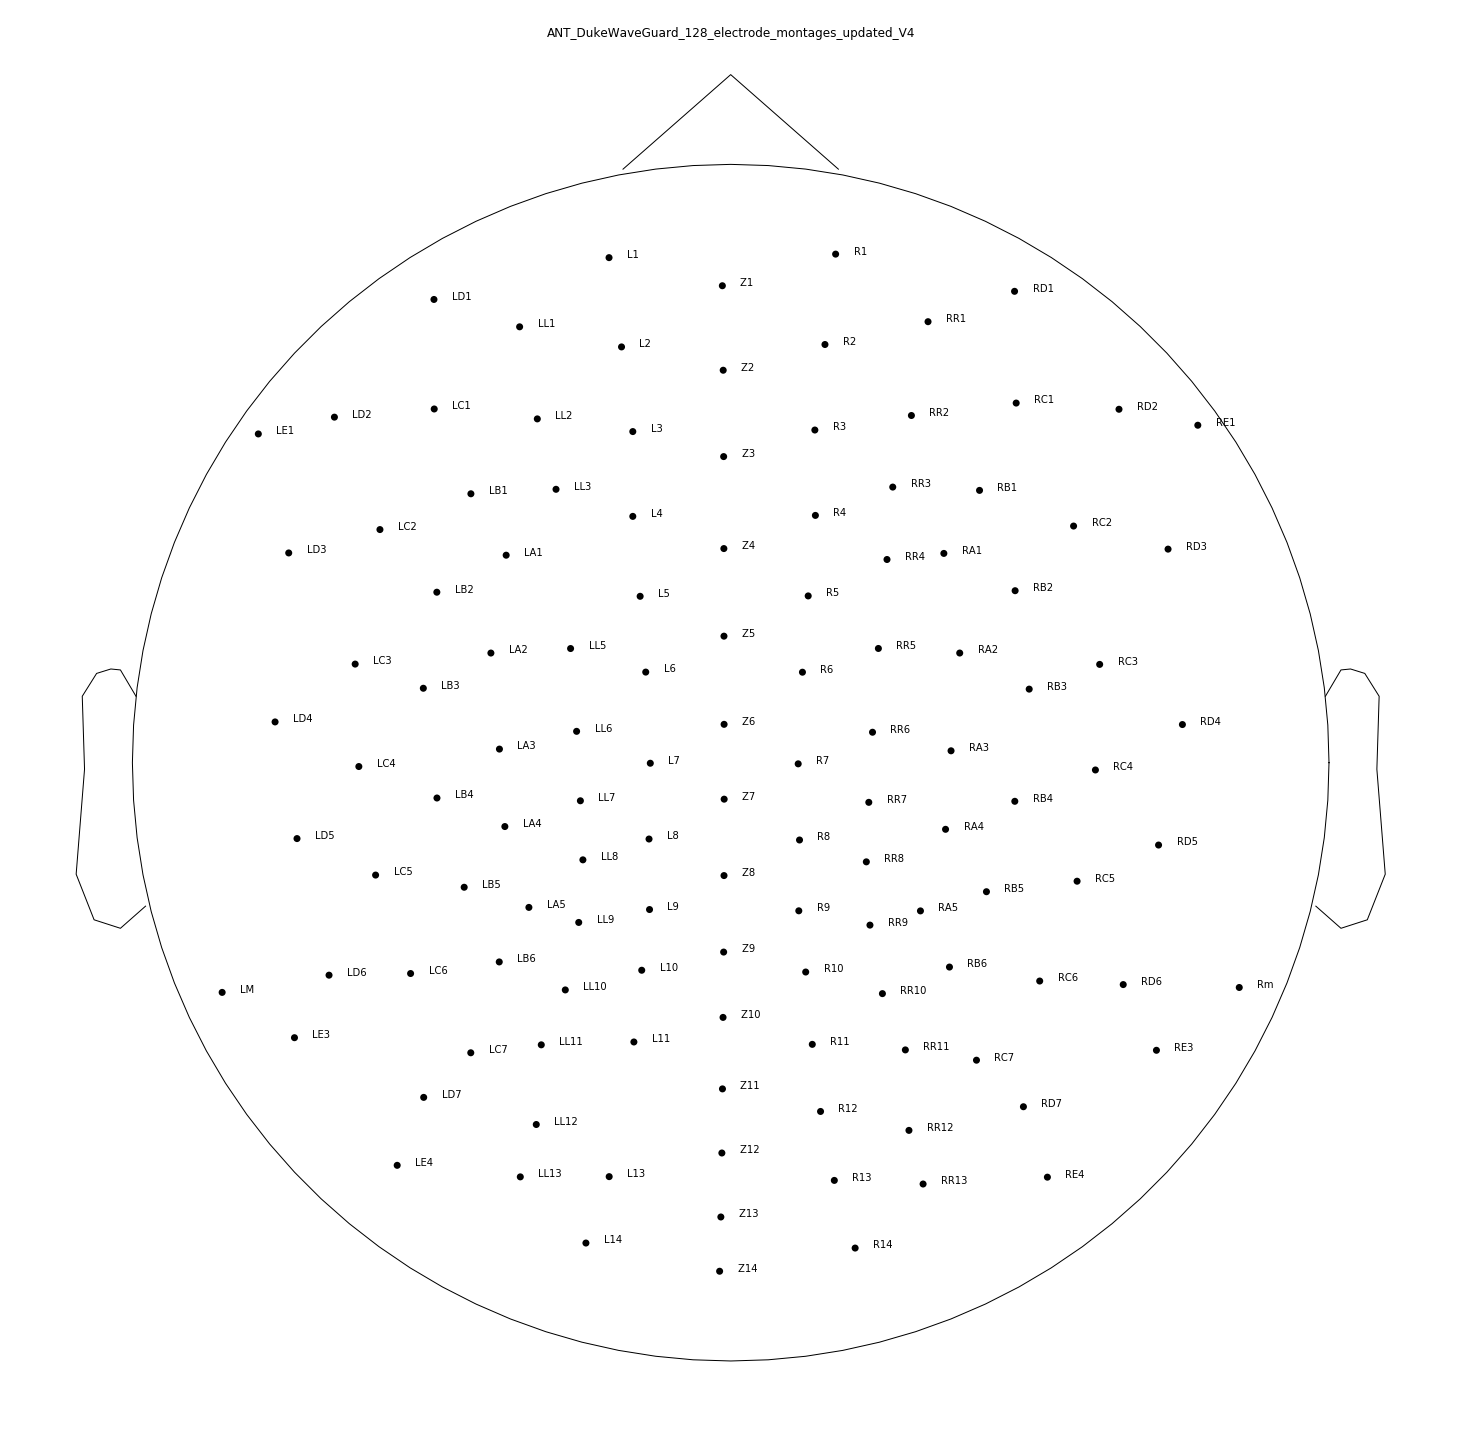

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
montage.plot(); 

In [12]:
# read in data 
# epoch_path = '/Volumes/SB/stim_code_epochs/20131216_1441_epo.fif'
epoch_path = '/Volumes/SB/stim_code_epochs/20140205_1114_epo.fif'
epoch = mne.read_epochs(epoch_path, preload=True)

Reading /Volumes/SB/stim_code_epochs/20140205_1114_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    1949.22 ms
        0 CTF compensation matrices available
951 matching events found
Applying baseline correction (mode: mean)
951 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [13]:
epoch.set_montage(montage)

The following EEG sensors did not have a position specified in the selected montage: ['Nasium', 'LL4', 'L12', 'VEOG']. Their position has been left untouched.


<ipython-input-13-2b9523d69e31>:1: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['Nasium', 'LL4', 'L12', 'VEOG']. Their position has been left untouched.
  epoch.set_montage(montage)


<EpochsFIF  |   951 events (all good), 0 - 1.94922 sec, baseline [0, 0], ~468.3 MB, data loaded,
 'b-f1-pic': 40
 'b-f1-snd': 60
 'b-f1-spk': 80
 'b-f1-wrd': 39
 'b-f2-pic': 40
 'b-f2-snd': 60
 'b-f2-spk': 80
 'b-f2-wrd': 39
 'b-tg-pic': 40
 'b-tg-snd': 80
 'b-tg-spk': 79
 'b-tg-wrd': 20
 'f-f1-pic': 40
 'f-f1-snd': 20
 'f-f1-spk': 19
 'f-f1-wrd': 19
 'f-f2-pic': 40
 'f-f2-snd': 20
 'f-f2-spk': 19
 'f-f2-wrd': 19
 'f-tg-pic': 19
 'f-tg-snd': 59
 'f-tg-spk': 0
 'f-tg-wrd': 20>

#### Drop the bad channels: Lm, Rm, Nasium, VEOG

In [14]:
## Drop the bad channels 
epoch.ch_names

['Lm',
 'LE1',
 'Nasium',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'VEOG',
 'RE3',
 'Rm',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 

In [15]:
epoch.drop_channels(['Lm', 'Rm', 'Nasium', 'VEOG'])

<EpochsFIF  |   951 events (all good), 0 - 1.94922 sec, baseline [0, 0], ~453.8 MB, data loaded,
 'b-f1-pic': 40
 'b-f1-snd': 60
 'b-f1-spk': 80
 'b-f1-wrd': 39
 'b-f2-pic': 40
 'b-f2-snd': 60
 'b-f2-spk': 80
 'b-f2-wrd': 39
 'b-tg-pic': 40
 'b-tg-snd': 80
 'b-tg-spk': 79
 'b-tg-wrd': 20
 'f-f1-pic': 40
 'f-f1-snd': 20
 'f-f1-spk': 19
 'f-f1-wrd': 19
 'f-f2-pic': 40
 'f-f2-snd': 20
 'f-f2-spk': 19
 'f-f2-wrd': 19
 'f-tg-pic': 19
 'f-tg-snd': 59
 'f-tg-spk': 0
 'f-tg-wrd': 20>

In [16]:
epoch.ch_names

['LE1',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'RE3',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 'LE4',
 'STI 014']

## Classification experiment (to generate coefficients)
Audio vs. Visual  
data: stim_code_epochs/20131216_1441_epo.fif  
classifier: Logistic regression  


In [17]:
%run ../preprocessing/Artifact_Removal/Extract_Describer_Events.ipynb
%run ../preprocessing/Artifact_Removal/preprocecssing_helpers.ipynb
%run ../preprocessing/Artifact_Removal/Batch_ArtifactFilter_Epoch.ipynb
%run ../preprocessing/StimCodes.ipynb
%run ../Classification/ConcatEpochTrails.ipynb


ERROR:root:File `'preprocecssing_helpers.ipynb.py'` not found.
ERROR:root:File `'Batch_ArtifactFilter_Epoch.ipynb.py'` not found.
ERROR:root:File `'preprocecssing_helpers.ipynb.py'` not found.


In [18]:
audio_visual = convert_epoch_events_to_stim_combinations(epoch)

In [19]:
audio_visual

array([[  9559,      0,   1112],
       [  9843,      0,   1112],
       [ 10110,      0,   1112],
       ...,
       [423929,      0,    812],
       [424170,      0,    812],
       [424420,      0,    812]])

In [21]:
type(audio_visual[0])

numpy.ndarray

In [22]:
# replace the epoch.events with this audio_visual array
epoch.events.shape

(951, 3)

In [23]:
audio_visual.shape

(951, 3)

In [24]:
epoch.events = audio_visual
